If we have random positive and negative edges in a k5 graph, then how many iterations are required to make it stable? Is there any relationship between the initial number of positive edges and number of iterations required to make the graph stable?

In [ ]:
import random as r
import networkx as nx
import matplotlib.pyplot as plt
import time

In [ ]:
def make_network(n):
  #returns a complete network of n nodes with random positive and negative edges
  #edge attribute 'sign'=1 for positive edge and -1 for negative edges
  #it also returns the number of positive edges

  g=nx.Graph()
  g.add_nodes_from(list(range(1,n+1)))
  c=0

  for i in g.nodes():
    for j in g.nodes():
      if i!=j:
        s=r.choice([-1,1])
        g.add_edge(i,j,sign=s)
        if s==1 : c+=1
  return g,c

def display(g):
  #draws a graph with colored edges, with node labels, in circular layout
  nx.draw_circular(g,with_labels=True,edge_color=get_colour(g))
  plt.show()

def get_colour(g):
  #returns list of colours corresponding to 'sign' attribute of each edge
  #blue edges : +1 ; red edges : -1
  c=[]
  for i in g.edges():
    if g.edges()[i]["sign"]==-1 : c.append("red")
    else: c.append("blue")
  return c

def unstable_triangles(g):
  '''unstable triangle conditions :
  ((s1==-1 and s2==-1 and s3==-1) or (s1==-1 and s2==1 and s3==1) or (s2==-1 and s1==1 and s3==1) or (s3==-1 and s2==1 and s1==1)) 
  is eqivalent to (s1*s2*s3==-1) '''

  l=[] #list of combinations of all nodes taken 3 at a time (i.e. list of all triangle)
  for i in g.nodes():
      for j in g.nodes():
        for k in g.nodes():
          if i!=j and j!=k and i!=k:
            s1,s2,s3=g.edges()[(i,j)]["sign"],g.edges()[(i,k)]["sign"],g.edges()[(k,j)]["sign"]
            if (s1*s2*s3==-1) and ({i,j,k} not in l) : l.append({i,j,k})
  return l


def stablize(g):
          #return a list of number of unstable triangles on each step
          #it also stabilizes the whole network
          L=[]
          unstable=unstable_triangles(g)
          L.append(len(unstable))
          while unstable!=[]:
            i,j,k=unstable[0]
            s1,s2,s3=g.edges()[(i,j)]["sign"],g.edges()[(i,k)]["sign"],g.edges()[(k,j)]["sign"]
            num=r.uniform(0,1)
            if s1==-1 and s2==-1 and s3==-1: #'all enemies' triangle
              #3 stable possibilities (1 enemy pair will turn into a friend pair)
              if num<=1/3: s1=1
              elif num<=2/3: s2=1
              else: s3=1

            elif s1==-1 and s2==1 and s3==1: #'1 enemy 2 friends' triangle case 1
              #3 stable possibilities
              if num<=0.01: s1=1 #0.01= probability that enemy pair will turn into friend pair (not calculated just randomly assigned)
              elif num<=(0.99/2): s2=-1
              else: s3=-1

            elif s2==-1 and s1==1 and s3==1: #'1 enemy 2 friends' triangle case 2
              #3 stable possibilities
              if num<=0.01: s2=1
              elif num<=(0.99/2): s1=-1
              else: s3=-1

            elif s3==-1 and s2==1 and s1==1: #'1 enemy 2 friends' triangle case 3
              #3 stable possibilities
              if num<=0.01: s3=1
              elif num<=(0.99/2): s2=-1
              else: s1=-1
            g.edges()[(i,j)]["sign"],g.edges()[(i,k)]["sign"],g.edges()[(k,j)]["sign"]=s1,s2,s3
            unstable=unstable_triangles(g)
            L.append(len(unstable)) #list of number of unstable triangles
          return L

def see_stabilisation(evolve):
  l=list(range(0,len(evolve)))
  plt.bar(l,evolve)
  plt.show()

def avg_list(l):
  s=0
  for i in l:
    s+=i
  return (s/len(l))

def plot_relation(x,y,xl="xlabel",yl="ylabel",title="tiltle"):
  plt.scatter(x, y)
  plt.xlabel(xl)  
  plt.ylabel(yl)
  plt.title(title)  
  plt.show() 

Average number of iterations :  12.37743


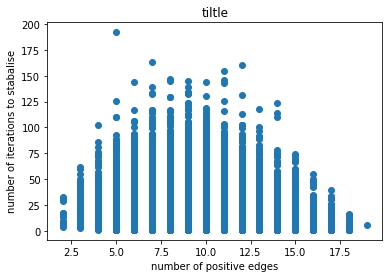

In [ ]:
n=5
y=[]
x=[]
m=10**5
for i in range(m):
  g=make_network(n)
  G=g[0] #k5 graph
  x+=[g[1]] #number of positive edges
  y+=[len(stablize(G))]
print("Average number of iterations : ",avg_list(y))

plot_relation(x,y,xl="number of positive edges",yl="number of iterations to stabalise",title="tiltle")